# Initializing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using url as data set is grater than 100mb
calendar_df = pd.read_csv('http://data.insideairbnb.com/turkey/marmara/istanbul/2020-03-22/data/calendar.csv.gz', 
                          parse_dates=['date'])
listings_df = pd.read_csv('http://data.insideairbnb.com/turkey/marmara/istanbul/2020-03-22/visualisations/listings.csv')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,4826,2020-03-23,t,$688.00,$688.00,1.0,730.0
1,87024,2020-03-23,t,"$1,752.00","$1,752.00",1.0,730.0
2,87024,2020-03-24,t,"$1,752.00","$1,752.00",1.0,730.0
3,87024,2020-03-25,t,"$1,752.00","$1,752.00",1.0,730.0
4,87024,2020-03-26,t,"$1,752.00","$1,752.00",1.0,730.0


In [3]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,688,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,780,365,41,2018-11-07,0.34,2,204
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,210,20,13,2018-05-04,0.20,1,325
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,695,3,0,NaN,NaN,19,350
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,786,3,0,NaN,NaN,1,88


From above we see that we have object inplace of price and adjusted_price in claender_df, so let us do that

In [4]:
def convert_price_to_float(df, col):
    '''
    INPUT :
        - df = dataframe, the dataframe containing the col
        - col = the column name which we want to convert
    OUTPUT :
        - returns a numpy.array with all values converted to float
    '''
    result = np.zeros(len(df))
    for i, p in enumerate(df[col]):
        if type(p)==str:
            p = float(p[1:].replace(',', ''))
        result[i] = p
    return result

In [5]:
# Converting both price columns to numbers
calendar_df['price'] = convert_price_to_float(calendar_df, 'price')
calendar_df['adjusted_price'] = convert_price_to_float(calendar_df, 'adjusted_price')

# Sorting the dataset acccording to date
calendar_df.sort_values(by='date', inplace=True)

In [6]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8566593 entries, 3010295 to 8423625
Data columns (total 7 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             float64
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 522.9+ MB


Now let's see weather the neighbourhood_group column of listingn dataset contains any valuse

In [7]:
# Checking if the whole neighbourhood_group column just contains NaN
listings_df['neighbourhood_group'].isnull().all()

True

As the neighbourhood_group is empty lets remove the column

In [8]:
# Droping the neighbourhood_group column
listings_df.drop('neighbourhood_group', axis=1, inplace=True)

# When should I visit ?

In [9]:
# Add inf a new field month_year Which is a combination of moonth and year
calendar_df['month_year'] = pd.to_datetime(calendar_df['date']).dt.to_period('M')

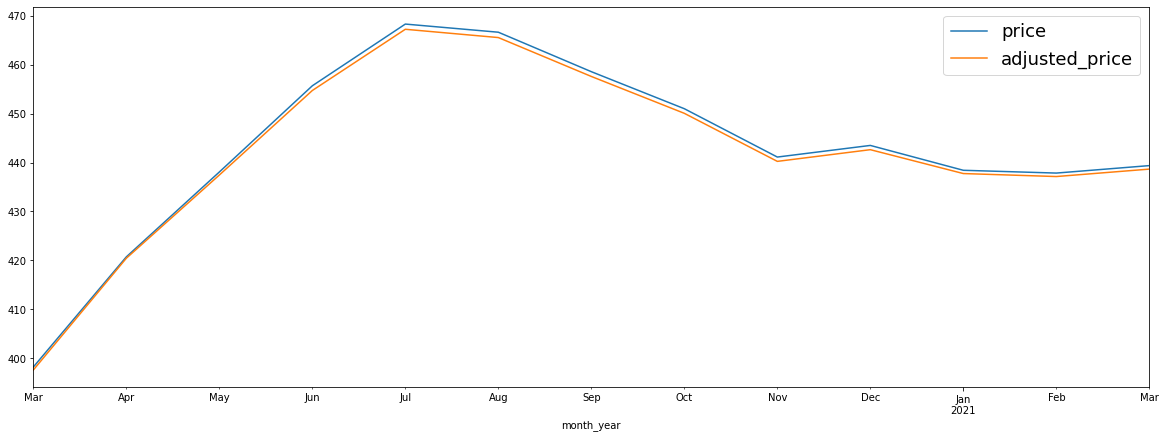

In [10]:
price_time_df = calendar_df[['month_year', 'price', 'adjusted_price']].groupby('month_year').mean()
price_time_df.plot(figsize=(20,7)).legend(fontsize=18);

We can say from the above that any time from Jan to March seems to be a good pick for a budget trip to istabul

# Where can I find the most expensive hotels ? 

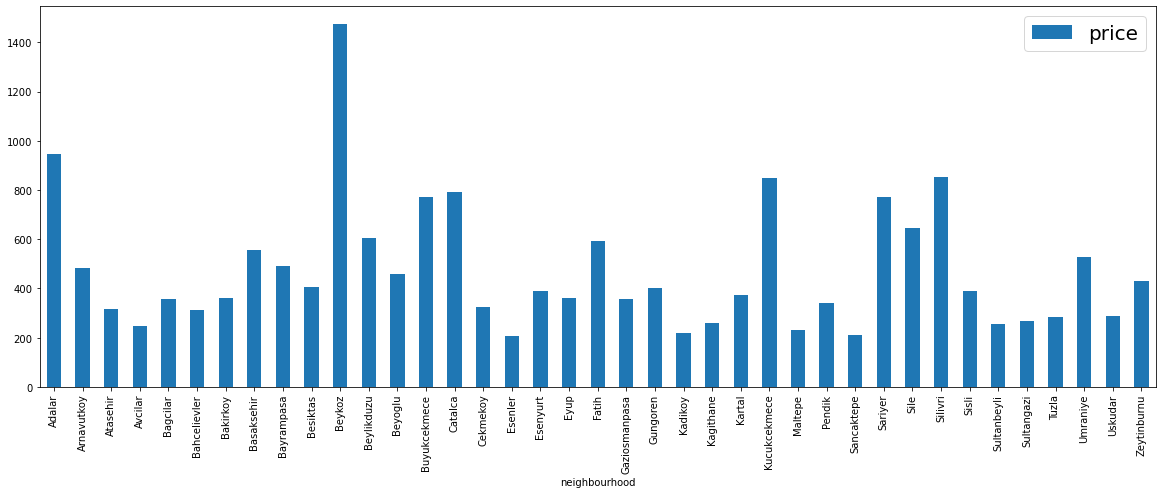

In [11]:
neighbour_room_df = listings_df[['neighbourhood', 'price', 'room_type']].groupby(['neighbourhood']).mean()
neighbour_room_df.plot.bar(figsize=(20,7)).legend(fontsize=20);

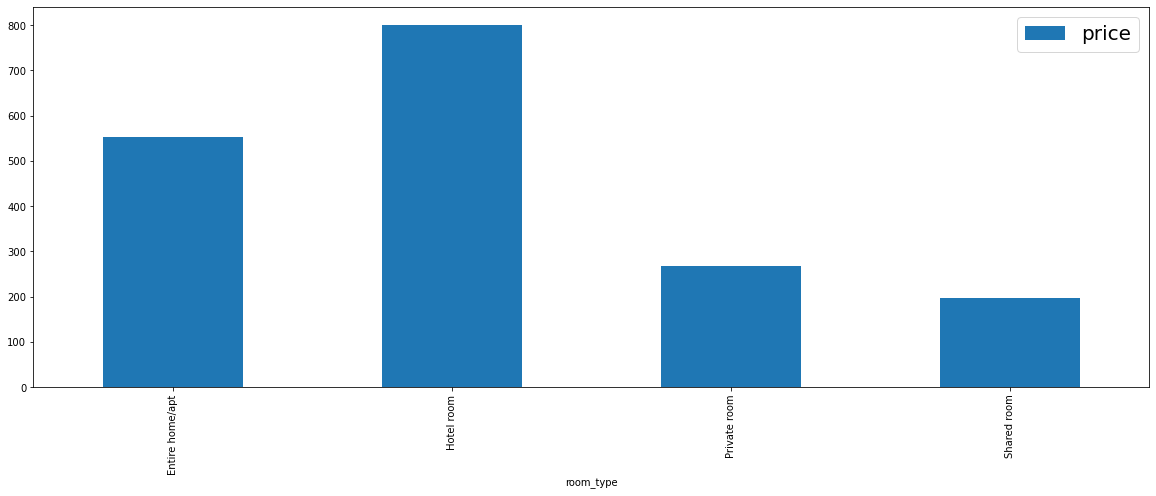

In [12]:
listings_df[['room_type', 'price']].groupby(['room_type']).mean().plot.bar(figsize=(20,7)).legend(fontsize=20);

By looking at the 2 above graphs one might think taht Hotel room in Beykor will be the most expensieve, but we get a different picture when be graph prices according to neighborhood and room type

In [13]:
pricing_df = listings_df[['neighbourhood', 'price', 'room_type']].groupby(['neighbourhood', 'room_type']).mean()

# Getting all unique values of room_type
room_types = listings_df.room_type.unique()

# un stackign the data
pricing_df = pricing_df.unstack()

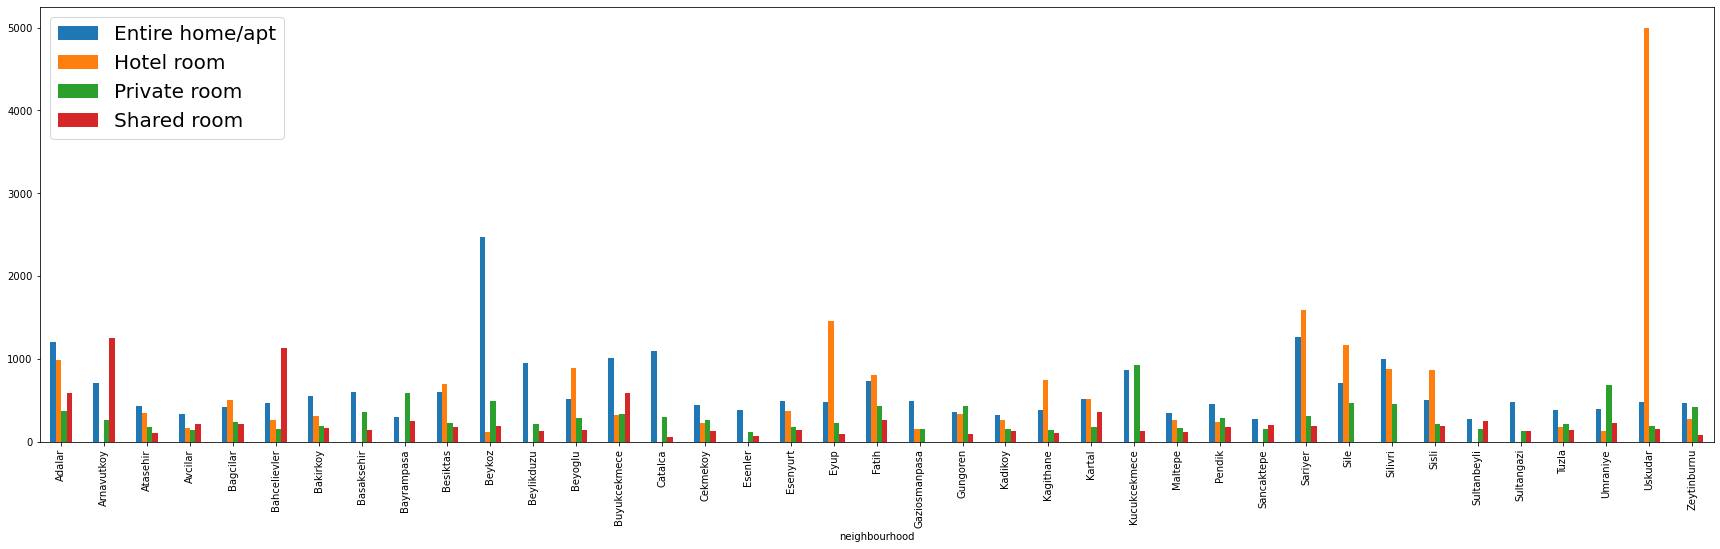

In [14]:
pricing_df.plot.bar(figsize=(30,8)).legend(room_types, fontsize=20);

In [15]:
pricing_df.head()

price                                      
room_type     Entire home/apt  Hotel room Private room  Shared room
neighbourhood                                                      
Adalar            1200.482759  984.000000   366.470588   590.000000
Arnavutkoy         715.793103         NaN   258.487805  1254.000000
Atasehir           434.881818  349.777778   177.214724   101.526316
Avcilar            332.796117  165.400000   145.101266   212.500000
Bagcilar           421.612245  501.000000   240.422222   209.111111

We can see that we have some missing values, we will drop as well as fill them with the mean bellow

### Fill missing data with the mean

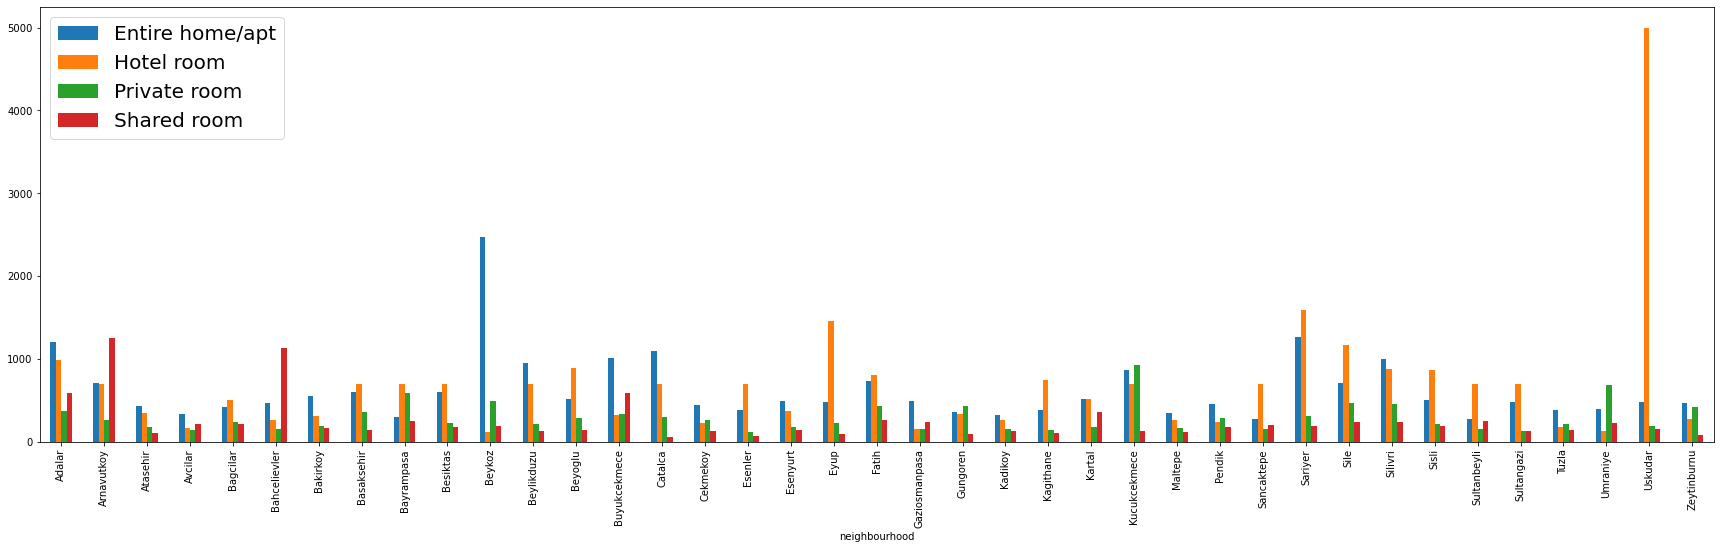

In [16]:
fill_na_with_mean = lambda col: col.fillna(col.mean())
pricing_df.apply(fill_na_with_mean).plot.bar(figsize=(30,8)).legend(room_types, fontsize=20);

### Droping the missing values

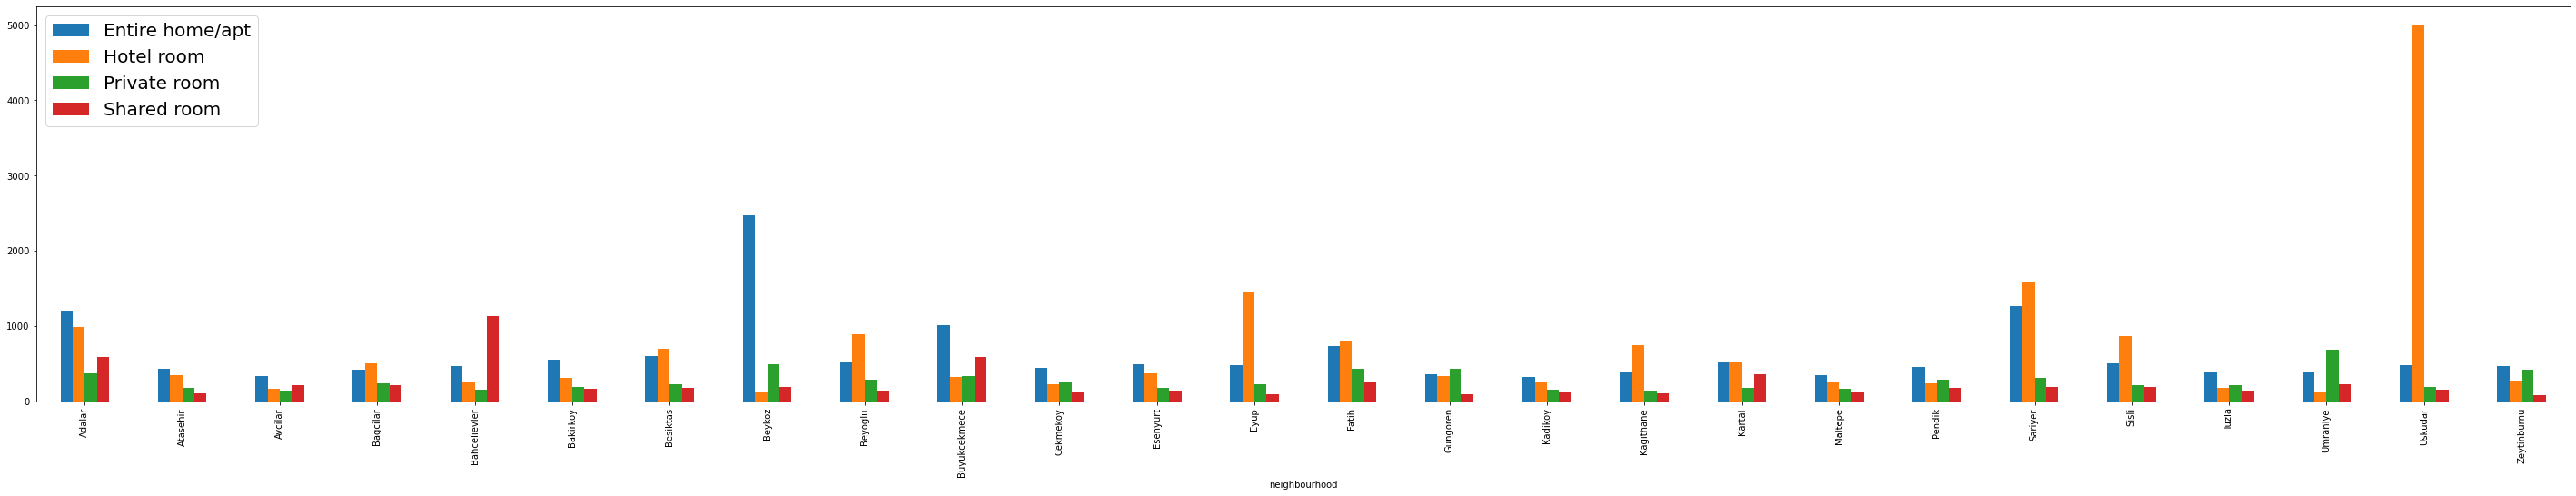

In [17]:
pricing_df.dropna(how='any').plot.bar(figsize=(50,8)).legend(room_types,fontsize=20);

# Which place has the highest number of hotels rooms listed ?

After knowing about wich places are most expenieve we should also look which places provide room, as we want to search for room in a neighborhood that provide it 

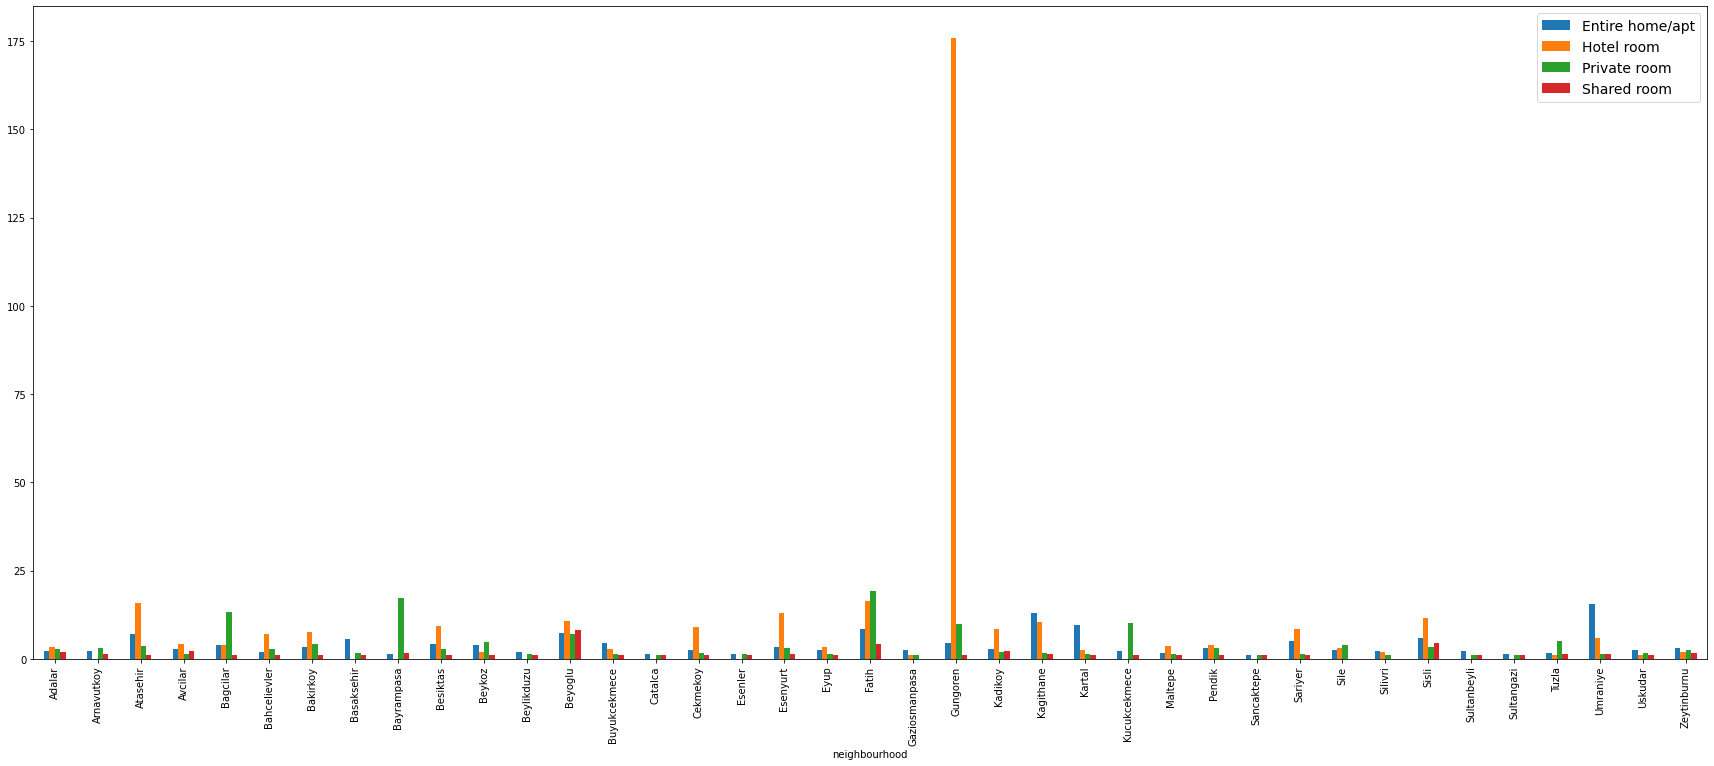

In [18]:
listing_count = listings_df[['neighbourhood', 'calculated_host_listings_count', 'room_type']]
listing_count = listing_count.groupby(['neighbourhood', 'room_type']).mean()
listing_count = listing_count.unstack()
listing_count.plot.bar(figsize=(30,12)).legend(room_types, fontsize=14);

So from above we can see that Gungoren provides an extremely large no of Hotel rooms